In [251]:
'''
Task 1: Load the data and get familiar with it.
'''
import pandas as pd
from matplotlib import pyplot as plt

imdb_df = pd.read_csv("imdb.csv")
imdb_df.head(10)

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate
5,Ted Lasso,2021,8.8,"117,562","Comedy, Drama, Sport",30,Series,TV-MA,23,Mild,None,Severe,Mild,None
6,Free Guy,2021,7.3,"153,835","Action, Adventure, Comedy",115,Film,PG-13,-,Mild,Moderate,Moderate,None,Mild
7,House of the Dragon,2021,No Rate,No Votes,"Action, Adventure, Drama",None,Series,None,10,No Rate,No Rate,No Rate,No Rate,No Rate
8,What If...?,2021,7.6,"51,959","Animation, Action, Adventure",None,Series,TV-14,18,None,Moderate,Mild,Mild,Moderate
9,Sex Education,2021,8.3,"220,201","Comedy, Drama",45,Series,TV-MA,25,Severe,Mild,Severe,Moderate,Mild


In [252]:
'''
This data source provides a look at the popularity ratings of movies and tv shows on IMDb. Along with ratings, it also includes information about each movie and show such as year of realease, genre, duration, type, certificate rating, etc. 
Link: https://www.kaggle.com/datasets/mazenramadan/imdb-most-popular-films-and-series?resource=download
'''

'\nThis data source provides a look at the popularity ratings of movies and tv shows on IMDb. Along with ratings, it also includes information about each movie and show such as year of realease, genre, duration, type, certificate rating, etc. \nLink: https://www.kaggle.com/datasets/mazenramadan/imdb-most-popular-films-and-series?resource=download\n'

In [253]:
'''
Questions to investigate dataset:
1. What are the top 15 most popular movies of all time? 
2. Which genres produce the most popular movies?
3. Which years produced the most highly rated movies (8.0 and above)?
'''

'\nQuestions to investigate dataset:\n1. What are the top 15 most popular movies of all time? \n2. Which genres produce the most popular movies?\n3. Which years produced the most highly rated movies (8.0 and above)?\n'

In [254]:
'''
Task 2: Follow the data cleaning steps to clean the data.
'''

# Removes all unrelated features from the original dataset
remove = ['Nudity', 'Violence', 'Profanity', 'Alcohol', 'Frightening', 'Episodes', 'Certificate', 'Duration', 'Votes']  
imdb_df = imdb_df.drop(remove, axis=1)
imdb_df.head(10)

# Addresses missing values in datafame
imdb_df['Rate'] = imdb_df['Rate'].replace(['No Rate'], None)
imdb_df = imdb_df.dropna()

# Drops duplicates
imdb_df = imdb_df.drop_duplicates()

# Checks the data type of each column to ensure it is correct and update if needed
imdb_df.dtypes
imdb_df = imdb_df.astype({'Rate': float})
imdb_df.dtypes

Name      object
Date       int64
Rate     float64
Genre     object
Type      object
dtype: object

In [255]:
'''
Task 3 - Question 1: What are the top 15 most popular movies of all time?
'''

# Removes tv shows from the dataframe
imdb_movies_df = imdb_df.drop(imdb_df.loc[imdb_df['Type']=='Series'].index)

# Gets top 15 movies with the highest ratings
highest_rated_movies_df = imdb_movies_df.nlargest(15, 'Rate')
highest_rated_movies_df

,Name,Date,Rate,Genre,Type
201,The Shawshank Redemption,1994,9.3,Drama,Film
819,Toma,2021,9.3,"Biography, Drama, Music",Film
251,The Godfather,1972,9.2,"Crime, Drama",Film
3611,Sardar Udham,2021,9.2,"Biography, Crime, Drama",Film
270,The Dark Knight,2008,9.0,"Action, Crime, Drama",Film
839,12 Angry Men,1957,9.0,"Crime, Drama",Film
929,The Godfather: Part II,1974,9.0,"Crime, Drama",Film
2742,Chal Mera Putt 2,2020,9.0,Drama,Film
320,Pulp Fiction,1994,8.9,"Crime, Drama",Film
555,Schindler's List,1993,8.9,"Biography, Drama, History",Film


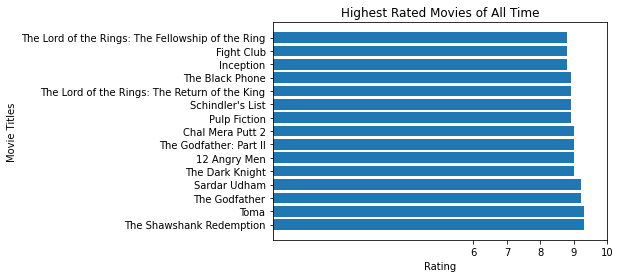

In [256]:
import numpy as np

# Creates bar chart to show a comparison in ratings of the top rated movies
plt.barh(highest_rated_movies_df.iloc[:, 0], highest_rated_movies_df.iloc[:, 2] )
plt.title('Highest Rated Movies of All Time')
plt.xlabel('Rating')
plt.ylabel('Movie Titles')

# Sets x and y axis info
plt.xticks(np.arange(6, 11))

plt.show()

In [257]:
'''
Findings for Question 1: The highest rated movies of all time range over a large group of different genres and release years. The graph shows that most of the movies hold a rating of 9.0 or above with all of the top ratings landing above 8.5. Majority of the genre groups for these top rated movies list Drama in the group, which helps us come to the assumption that drama movies tend to have good ratings. There does not seem to be a clear correlation between year of release and high ratings in the graph or data frame. Most of the movies in the chart are well known movies that are known to be popular in the movie world. The movie with the highest rating is 'The Shawshank Redemption' which has a rating of 9.3 and the movie witht he lowest rating on this ist is 'The Lord of the Rings: The Fellowship of the Ring' which has a rating of 8.8. The average rating of the highest rated movies list is a rating of 9.0. 
'''

"\nFindings for Question 1: The highest rated movies of all time range over a large group of different genres and release years. The graph shows that most of the movies hold a rating of 9.0 or above with all of the top ratings landing above 8.5. Majority of the genre groups for these top rated movies list Drama in the group, which helps us come to the assumption that drama movies tend to have good ratings. There does not seem to be a clear correlation between year of release and high ratings in the graph or data frame. Most of the movies in the chart are well known movies that are known to be popular in the movie world. The movie with the highest rating is 'The Shawshank Redemption' which has a rating of 9.3 and the movie witht he lowest rating on this ist is 'The Lord of the Rings: The Fellowship of the Ring' which has a rating of 8.8. The average rating of the highest rated movies list is a rating of 9.0. \n"

In [258]:
'''
Task 3 - Question 2: Which genres produce the most popular movies?
'''
rating_group = imdb_movies_df.groupby('Genre')
highest_rated_genres = rating_group['Rate'].mean().nlargest(10)
highest_rated_genres

Genre
Biography                       8.70
Animation, Drama, War           8.50
Drama, Mystery, War             8.35
Adventure, Drama, War           8.30
Adventure, Mystery, Thriller    8.30
Crime, Drama, Film-Noir         8.30
Crime, Drama, Sci-Fi            8.30
Mystery, Romance, Thriller      8.30
Animation, Drama                8.20
Drama, Fantasy, History         8.20
Name: Rate, dtype: float64

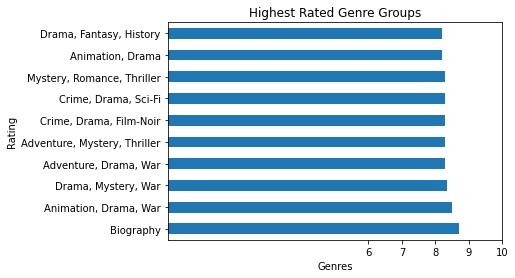

In [259]:
# Creates bar chart to show the highest rated genre groups
highest_rated_genres.plot(kind = 'barh')
plt.title('Highest Rated Genre Groups')
plt.xlabel('Genres')
plt.ylabel('Rating')

# Sets x and y axis info
plt.xticks(np.arange(6, 11))

plt.show()

In [260]:
'''
Findings for Question 2: The highest rated genre groups include a wide range of different genres. The individual genres that appear in a lot of the highest rated genre groups are Drama, War, and Crime. All the top-rated genre groups have a very similar rating falling between 8.2 and 8.7 with little difference between the highest rated genre group's rating and the lowest rated genre group on this list. The genre group with the highest rating is 'Biography' which has a rating of 8.7 and the genre group with the lowest rating on this list is 'Drama, Fantasy, History' which has a rating of 8.2. The average rating of the highest rated genre groups is a rating of 8.3. The results of both the data frame and the graph, as well as the average rating of the genre groups on the graph, allow us to make the assumption that any movie genre or genre group with a rating of 8.0 or above can be considered highly rated or popular.
'''

"\nFindings for Question 2: The highest rated genre groups include a wide range of different genres. The individual genres that appear in a lot of the highest rated genre groups are Drama, War, and Crime. All the top-rated genre groups have a very similar rating falling between 8.2 and 8.7 with little difference between the highest rated genre group's rating and the lowest rated genre group on this list. The genre group with the highest rating is 'Biography' which has a rating of 8.7 and the genre group with the lowest rating on this list is 'Drama, Fantasy, History' which has a rating of 8.2. The average rating of the highest rated genre groups is a rating of 8.3. The results of both the data frame and the graph, as well as the average rating of the genre groups on the graph, allow us to make the assumption that any movie genre or genre group with a rating of 8.0 or above can be considered highly rated or popular.\n"

In [261]:
'''
Task 3 - Question 3: Which years produced the most highly rated movies (Movies rated 8.0 and above)?
'''
# Gets number of movies with a rating of 8.0 or above in each year
highest_rated_year = imdb_movies_df.loc[imdb_movies_df['Rate'] >= 8.0]
year_rating_group = highest_rated_year.groupby('Date')
years_for_high_rated_movies = year_rating_group.size()
years_for_high_rated_movies

# Gets top 10 years with the most highly rated movies
top_years_for_high_rated_movies = years_for_high_rated_movies.nlargest(10)
top_years_for_high_rated_movies

Date
2021    22
1995    10
2016    10
2003     9
2014     8
1999     7
2004     7
2006     7
2010     7
2018     7
dtype: int64

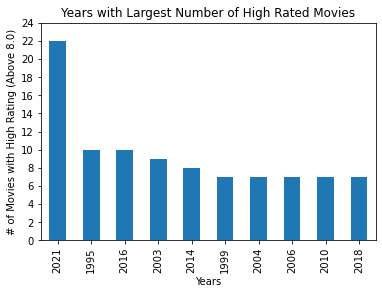

In [262]:
# Creates chart to show correlation between number of high rated movies released in different years
top_years_for_high_rated_movies.plot(kind = 'bar')
plt.title('Years with Largest Number of High Rated Movies')
plt.xlabel('Years')
plt.ylabel('# of Movies with High Rating (Above 8.0)')

# Sets x and y axis info
plt.xticks(rotation = 'vertical')
plt.yticks(np.arange(0, 25, 2))

plt.show()

In [263]:
'''
Findings for Question 3: The graph shows that there is a significant difference between the number of movies with high ratings that were released in 2021 as opposed to the other years present on the graph. 2021 released 22 movies that were rated 8.0 and above while 1995 only released 10. Although the number of highly rated movies that were released in 1995, as well as the remaining years on the list, seems low in comparison to 2018, they are all still among this list of 10 different years that released the most highly rated movies. The average number of movies with high ratings released during the years present on the graph 9.4 movies. This allows us to make the assumption that if there were 9 or more movies rated 8.0 or above released in a certain year, that year can be considered one of the best producing years for movie releases.
'''

'\nFindings for Question 3: The graph shows that there is a significant difference between the number of movies with high ratings that were released in 2021 as opposed to the other years present on the graph. 2021 released 22 movies that were rated 8.0 and above while 1995 only released 10. Although the number of highly rated movies that were released in 1995, as well as the remaining years on the list, seems low in comparison to 2018, they are all still among this list of 10 different years that released the most highly rated movies. The average number of movies with high ratings released during the years present on the graph 9.4 movies. This allows us to make the assumption that if there were 9 or more movies rated 8.0 or above released in a certain year, that year can be considered one of the best producing years for movie releases.\n'

In [264]:
'''
Task 4: Sumarize the main findings from this project as well as what you failed to find from the results. Describe what you want to further explore about the topic.

Over the course of this project, I found out that the top rated movies are not solely tied to a certain year, genre, or genre group. There was, however, a trend in the 15 top rated movies of all time. Most of the top rated movies of all time listed either Drama or Crime in there genre groups. This helps us form the understanding that these two individual genres are fairly popular among movie watchers. I was also able to find that many of the movies or genre groups that were included in these top 10 lists had a rating of 8.0 and above. This shows that in order for a movie to be considered highly rated it must have a rating o 8.0 or above. This information was used to find the number of highly rated movies that were released in each year for question number three. That question revealed some pretty interesting information as it showed that 2021 produced significantly more highly rated movies than any other year. I found that they remaining years listed on the list of years with the largest number of high rated movies had an average number of 9 highly rated movies released. Although this average is significantly boosted by the numbers of 2021, it allows us to make the assumption that all years that released a total of 9 or more movies with rating above 8.0 were great years for the movie industry. I was unable to find any solid correlations between genre, year, and movie rating but the data provided enough information to make strong assumptions about trends in the data and future movies.
I would like to further explore this topic and try to find out how viewership numbers affect the ratings of movies as well as if the target audience of the movie makes a difference eon how a movie is rated. Example: Children's movie vs Thriller.
'''

"\nTask 4: Sumarize the main findings from this project as well as what you failed to find from the results. Describe what you want to further explore about the topic.\n\nOver the course of this project, I found out that the top rated movies are not solely tied to a certain year, genre, or genre group. There was, however, a trend in the 15 top rated movies of all time. Most of the top rated movies of all time listed either Drama or Crime in there genre groups. This helps us form the understanding that these two individual genres are fairly popular among movie watchers. I was also able to find that many of the movies or genre groups that were included in these top 10 lists had a rating of 8.0 and above. This shows that in order for a movie to be considered highly rated it must have a rating o 8.0 or above. This information was used to find the number of highly rated movies that were released in each year for question number three. That question revealed some pretty interesting informati